In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # plotting 3D figures
#%matplotlib inline # for notebooks only
import pandas as pd
import numpy as np
import sys # for exiting exceptions
import os # for hadling creation of foders
import pathlib # for extracting path of current directory
import subprocess # for running bash scripts
import sklearn
import seaborn as sns # for plotting statistics
import pickle # for serializing (saving into a binary file) and deserializing (loading from a binary file) data
#from matplotlib.patches import Patch
#from sklearn.model_selection import train_test_split # for splitting the data into trainng and testing data sets
from sklearn.preprocessing import StandardScaler # For scalling the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #For checking the performance of the model
from sklearn.cluster import KMeans # for labeling data
from sklearn import manifold, datasets  # for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering  # for Hierarchical clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances # for computinr a matrix of euclidean dinstances
import pylab
import scipy
import scipy.spatial.distance as ssd # convert the redundant n*n square matrix form into a condensed nC2 array
from scipy import ndimage # WARNIG Check this out!
from scipy.cluster import hierarchy # for Hierarchical clustering
from scipy.spatial import distance_matrix # for Hierarchical clustering
from scipy.cluster.hierarchy import fcluster # for hieralchical clustering specifying the number of clusters
import warnings
warnings.filterwarnings('ignore')
print("\nLibraries Imported")
#
#
#
# customizing presentation features of data frames
pd.set_option('display.max_columns',100)
pd.set_option('display.min_rows',10)
pd.set_option('display.max_rows',1000)
pd.set_option('display.width',200)
pd.set_option('expand_frame_repr',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('styler.format.precision',3)

#
#
# control values
inputFile                       = '../wind_timeSeries101.csv' #'wind_timeSeries101.csv'
outputFile                      = 'wind_timeSeries101_0nan.csv' #'wind_timeSeries101.csv'
objectName                      = 'wind_timeSeries102_windows_nanClean.obj' # saving data into a object (binary file)
objectName2                     = 'wind_timeSeries102_windows_nanClean.pickle' # saving data into a pickle (binary file)
objectName3                     = 'wind_timeSeries102_ubuntu_nanClean.obj' # saving data into a object (binary file)
objectName4                     = 'wind_timeSeries102_ubuntu_nanClean.pickle' # saving data into a pickle (binary file)
numberLabels                    = 12
numberReinitializations         = 24
nGroups                         = 500
number_clusters_aglomeartion    = 6
n_c_hierarch_linkCriteria2      = 3 # scipy.cluster.hierarchy criteria = 'distance'
n_c_hierarch_linkCriteria3      = 5 # scipy.cluster.hierarchy criteria = 'maxclust'
n_c_aglome_linkageCriteria2     = 6
n_c_aglome_linkageCriteria3     = 6
linkageCriteria1                = 'ward' # criteria to meassure distances with aglomerative clustering
linkageCriteria2                = 'average' # criteria to meassure distances with aglomerative clustering
linkageCriteria3                = 'complete' # criteria to meassure distances with aglomerative clustering
linkageCriteria4                = 'single' # criteria to meassure distances with aglomerative clustering
offset                          = 0 # initial row for selecting features
endPoint                        = 24500 # initial row for selecting features
#
# plotting variables
figureSize                      = (20,14)
figureSize2                     = (10,7)
file_path                       = 'charts_wind_clustering'
path_logo                       = 'IHC_logo'
bubbles_clusterPlot             = 'bubbles_clusterPlot'
bubbles_clusterPlot_3D          = 'bubbles_clusterPlot_3D' 
kmeans_criteria1                = 'kmeans_clustering_linkage_criteria_1'
kmeans_criteria2                = 'kmeans_clustering_linkage_criteria_2'
kmeans_criteria3                = 'kmeans_clustering_linkage_criteria_3'
aglometaion_criteria1           = 'Hieralchical_clustering_linkage_criteria_1'
aglometaion_criteria2           = 'Hieralchical_clustering_linkage_criteria_2'
aglometaion_criteria3           = 'Hieralchical_clustering_linkage_criteria_3'
hieralchical_criteria2          = 'Hieralchical_clustering_linkage_criteria_2'
hieralchical_criteria3          = 'Hieralchical_clustering_linkage_criteria_3'
#
# 
# 
# How to make blobs
# n_samples: number of samples
# centers : center of clusters
# cluster_std : standard deviation of the cluster points, the larger the more spread out are the points around the cluster centroid: [0.5,1.5] 
# X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
# 
# #
# loading data
# Sample 100 rows of data to determine dtypes.
#df_wind_test = pd.read_csv(inputFile, nrows=100) # This first reads a sample of 100 rows of data 
                                                 # (modify as required) to determine the type of each column.
"""
float_cols = [c for c in df_wind_test if df_wind_test[c].dtype == "float64"] 
# It the creates a list of those columns which are 'float64', and then uses 
#
#float32_cols = {c: np.float32 for c in float_cols}
float16_cols = {c: np.float16 for c in float_cols}
print(float16_cols)
"""
# dictionary comprehension to create a dictionary with these columns as the keys 
# and 'np.float32' as the value for each key.
#
df_wind = pd.read_csv(
    inputFile,  # file name
    skiprows=0,  # skip header
    delim_whitespace=True,  # whitespace separated
    #engine='c', #  it reads the whole file using the 'c' engine (required for assigning dtypes to columns)
    #dtype=float16_cols # passes the float32_cols dictionary as a parameter to dtype
    #na_values=['-99.9', '-99.99'],  # NaNs
)
# lets fix an issue with the TimeStamp column...
df_wind.rename(columns = {'TimeStamp':'Date'}, inplace = True)
df_wind['TimeStamp'] = df_wind.index
# lets cheack the basic information within the data
print(df_wind.head(20))
print("\n\n\n")
print(df_wind.tail(20))
print(df_wind.info())
print(df_wind.describe())
print(df_wind.columns)
#There is some nan values, so lets drop those rows where there is a nan value in a column
rows0,columns0 = df_wind.shape
print("\nInicial size of data set: ",rows0,columns0)
print("\nListing columns with null values:")
for i in df_wind.columns:
    print(str(i)+ ": " + str(df_wind[i].isnull().sum()))
print("\n\n Deletion of those rows with nan values\n")
df_wind.dropna(inplace=True)
df_wind = df_wind.reset_index(drop=True)
#
rows1,columns1 = df_wind.shape
print("\nFinal size of data set: ",rows1,columns1)
#
print("\nStreamiling data types")
float64_cols = df_wind.select_dtypes(include='float64').columns
mapper = {col_name: np.float16 for col_name in float64_cols}
df_wind = df_wind.astype(mapper)
#
print("\nPrinting some values of the data set")
print(df_wind.head(20))
print("\n\n\n")
print(df_wind.tail(20))
print(df_wind.info())
print(df_wind.describe())
#
#
print("\nFlattennig / serializing the dataFrame object with the pickle module")
df_wind.to_csv(outputFile, index=False)
dataObject = open(objectName2,'wb') # the 'wb' string means "writing bytes"
pickle_out = open(objectName3,'wb')
pickle.dump(df_wind,dataObject)
pickle.dump(df_wind,pickle_out)
dataObject.close()
pickle_out.close()
"""
print("\nLoading / deserializing an object into a new data frame with pickle module")
dataObject2 = open(objectName2,'rb') # the 'rb' string means "reading bytes"
#pickle_in = open(objectName3,'rb') # the 'rb' string means "reading bytes"
df_wind2 = pickle.load(dataObject2)
#df_wind3 = pickle.load(pickle_in)
dataObject2.close()
#pickle_in.close()
print(df_wind2.describe())
print(df_wind2.info())
#print(df_wind3.describe())
print("\nEnd of pickling check, moning om...\n\n\n")
df_wind = df_wind2
"""


Libraries Imported
                  Date      Time  Av_speed  Av_direction  Max_speed  Max_speed_direction   TimeStamp
1583020800  2020-03-01  01:00:00       6.5         284.0       12.1                302.0  1583020800
1583024400  2020-03-01  02:00:00       5.2         282.0       10.3                277.0  1583024400
1583028000  2020-03-01  03:00:00       2.0         292.0        7.6                302.0  1583028000
1583031600  2020-03-01  04:00:00       5.9         295.0       12.3                277.0  1583031600
1583035200  2020-03-01  05:00:00       6.0         284.0       12.0                277.0  1583035200
1583038800  2020-03-01  06:00:00       3.2         273.0        8.7                287.0  1583038800
1583042400  2020-03-01  07:00:00       3.6         286.0        7.3                285.0  1583042400
1583046000  2020-03-01  08:00:00       4.4         280.0        9.1                267.0  1583046000
1583049600  2020-03-01  09:00:00       3.5         278.0        9.5    

'\nprint("\nLoading / deserializing an object into a new data frame with pickle module")\ndataObject2 = open(objectName2,\'rb\') # the \'rb\' string means "reading bytes"\n#pickle_in = open(objectName3,\'rb\') # the \'rb\' string means "reading bytes"\ndf_wind2 = pickle.load(dataObject2)\n#df_wind3 = pickle.load(pickle_in)\ndataObject2.close()\n#pickle_in.close()\nprint(df_wind2.describe())\nprint(df_wind2.info())\n#print(df_wind3.describe())\nprint("\nEnd of pickling check, moning om...\n\n\n")\ndf_wind = df_wind2\n'

In [2]:
#
#
#
#
print("\n\nCreating Feature Matrix")
df_wind101 = df_wind.drop(['Date','Time','TimeStamp','Max_speed','Max_speed_direction'],axis = 1)
df_wind101_features = df_wind101[df_wind101.columns].iloc[offset:endPoint] # sub set for testing, it can be expanded
                                                                              # to cover all data set by çhanging values
                                                                              # of offset and endPoint 
print(df_wind101_features.describe())
print(df_wind101_features.info())
X_features = df_wind101_features.values[:,0:]
#
#X_features = df_wind101[df_wind101.columns[0:]]
print("\nClustring raw data:")
print(X_features)
print(f'Data type: {X_features.dtype}')
"""
Replace NaN with zero and infinity with large finite numbers (default behaviour) 
or with the numbers defined by the user using the nan, posinf and/or neginf keywords
"""
X_features = np.nan_to_num(X_features)#
print("\nClustring raw data with no nan:")
print(X_features)
print(f'Data type: {X_features.dtype}')
#Clus_dataSet = StandardScaler().fit_transform(X_features)
#X_features_StandardScaler = StandardScaler().fit_transform(X_features)
min_max_scaler = MinMaxScaler()
X_features_minMaxScales = min_max_scaler.fit_transform(X_features) #returns a numpy array
print("\nNormalized clustring data:")
print(X_features_minMaxScales)
print(f'Data type: {X_features_minMaxScales.dtype}')



Creating Feature Matrix
           Av_speed  Av_direction
count  24500.000000       24500.0
mean       2.330078           inf
std        1.650391         103.5
min        0.099976           1.0
25%        1.099609         131.0
50%        1.900391         261.0
75%        3.099609         312.0
max       15.101562         360.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24500 entries, 0 to 24499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Av_speed      24500 non-null  float16
 1   Av_direction  24500 non-null  float16
dtypes: float16(2)
memory usage: 95.8 KB
None

Clustring raw data:
[[  6.5 284. ]
 [  5.2 282. ]
 [  2.  292. ]
 ...
 [  1.7 162. ]
 [  1.2  72. ]
 [  1.1 357. ]]
Data type: float16

Clustring raw data with no nan:
[[  6.5 284. ]
 [  5.2 282. ]
 [  2.  292. ]
 ...
 [  1.7 162. ]
 [  1.2  72. ]
 [  1.1 357. ]]
Data type: float16

Normalized clustring data:
[[0.4265  0.788  ]
 [0.3398  0

In [3]:
#
#
#
#
print("\n\nCreating Feature Matrix")
df_wind101 = df_wind.drop(['Date','Time','TimeStamp','Max_speed','Max_speed_direction'],axis = 1)
df_wind101_features = df_wind101[df_wind101.columns].iloc[offset:endPoint] # sub set for testing, it can be expanded
                                                                              # to cover all data set by çhanging values
                                                                              # of offset and endPoint 
print(df_wind101_features.describe())
print(df_wind101_features.info())
X_features = df_wind101_features.values[:,0:]
#
#X_features = df_wind101[df_wind101.columns[0:]]
print("\nClustring raw data:")
print(X_features)
print(f'Data type: {X_features.dtype}')
"""
Replace NaN with zero and infinity with large finite numbers (default behaviour) 
or with the numbers defined by the user using the nan, posinf and/or neginf keywords
"""
X_features = np.nan_to_num(X_features)#
print("\nClustring raw data with no nan:")
print(X_features)
print(f'Data type: {X_features.dtype}')
#Clus_dataSet = StandardScaler().fit_transform(X_features)
#X_features_StandardScaler = StandardScaler().fit_transform(X_features)
min_max_scaler = MinMaxScaler()
X_features_minMaxScales = min_max_scaler.fit_transform(X_features) #returns a numpy array
print("\nNormalized clustring data:")
print(X_features_minMaxScales)
print(f'Data type: {X_features_minMaxScales.dtype}')



Creating Feature Matrix
           Av_speed  Av_direction
count  24500.000000       24500.0
mean       2.330078           inf
std        1.650391         103.5
min        0.099976           1.0
25%        1.099609         131.0
50%        1.900391         261.0
75%        3.099609         312.0
max       15.101562         360.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24500 entries, 0 to 24499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Av_speed      24500 non-null  float16
 1   Av_direction  24500 non-null  float16
dtypes: float16(2)
memory usage: 95.8 KB
None

Clustring raw data:
[[  6.5 284. ]
 [  5.2 282. ]
 [  2.  292. ]
 ...
 [  1.7 162. ]
 [  1.2  72. ]
 [  1.1 357. ]]
Data type: float16

Clustring raw data with no nan:
[[  6.5 284. ]
 [  5.2 282. ]
 [  2.  292. ]
 ...
 [  1.7 162. ]
 [  1.2  72. ]
 [  1.1 357. ]]
Data type: float16

Normalized clustring data:
[[0.4265  0.788  ]
 [0.3398  0

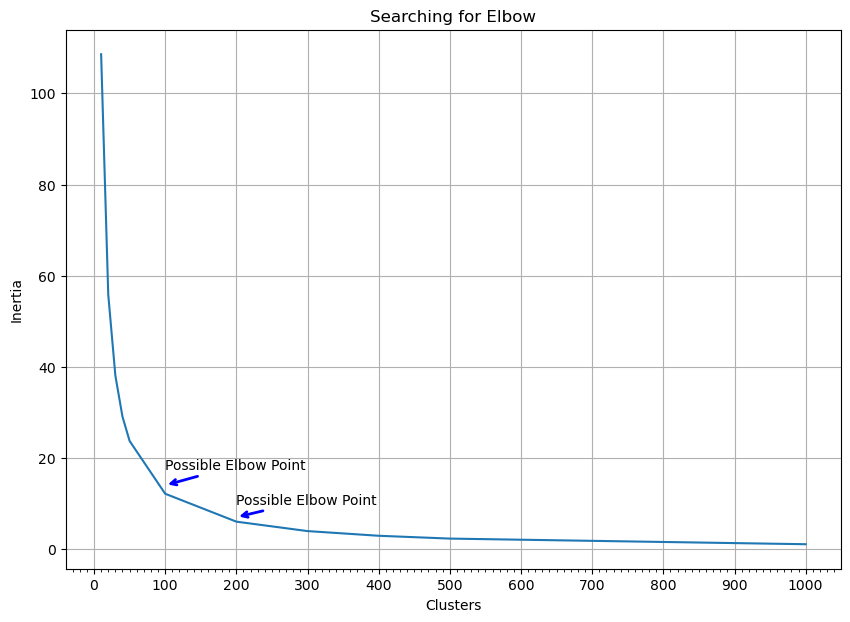

In [6]:
## 
# 
# 
n_clusters_vec = np.array([10,20,30,40,50,100,200,300,400,500,1000])
#n_clusters_vec = np.array([10,20,30,40])
def plotKmeansElbowMethod(n_clusters_vec,figureSize,X)->None:
    """
    Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph,
    """
    # remove this
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    clusters = []

    for ii in n_clusters_vec:
        km = KMeans(n_clusters=ii).fit(X)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=figureSize)
    sns.lineplot(x=list(n_clusters_vec), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')
    # Make a plot with major ticks that are multiples of 100 and minor ticks that
    # are multiples of 10.  Label major ticks with '.0f' formatting but don't label
    # minor ticks.  The string is used directly, the `StrMethodFormatter` is
    # created automatically.
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_major_formatter('{x:.0f}')
    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    
    ax.grid()
    # Annotate arrow
    ax.annotate('Possible Elbow Point', xy=(100,14), xytext=(100,17.4), xycoords='data',          
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

    ax.annotate('Possible Elbow Point', xy=(200,7), xytext=(200,9.8), xycoords='data',          
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
    plt.savefig('kmeans_elbowMethod_100p')
    plt.show()
# 
plotKmeansElbowMethod(n_clusters_vec,figureSize2,X_features_minMaxScales)

Labels found: [244 156  91 ... 117  81 376]
Cluster centers found: [[0.04117729 0.99284734]
 [0.19806019 0.33558239]
 [0.19909282 0.86439145]
 [0.15391235 0.15288086]
 [0.07960745 0.66395921]
 [0.38478564 0.79754739]
 [0.06546275 0.84168159]
 [0.01258921 0.41587999]
 [0.2994812  0.4074585 ]
 [0.05035277 0.06178325]
 [0.13556872 0.44428454]
 [0.21734744 0.74968112]
 [0.0201313  0.23547119]
 [0.09157925 0.90817619]
 [0.27951605 0.32231834]
 [0.47116571 0.84272204]
 [0.34716797 0.00626564]
 [0.08972071 0.3206729 ]
 [0.61865234 0.84284319]
 [0.04400024 0.74795673]
 [0.14660645 0.84276656]
 [0.13736816 0.03576416]
 [0.07648026 0.56148489]
 [0.35284198 0.38200322]
 [0.38612432 0.72027853]
 [0.29126507 0.81468665]
 [0.04000272 0.12503884]
 [0.03656355 0.93678413]
 [0.18438185 0.4106274 ]
 [0.3009382  0.14200265]
 [0.19070871 0.67903646]
 [0.12728729 0.5838623 ]
 [0.13944499 0.8715239 ]
 [0.07750388 0.46558096]
 [0.23019132 0.9161044 ]
 [0.12894694 0.36846246]
 [0.04351004 0.8854852 ]
 [0.2305

================== Cluster label 12
       Av_speed  Av_direction  Cluster_Labels_Kmeans
379    0.199951          87.0                     12
398    0.300049          89.0                     12
491    0.399902          86.0                     12
583    0.300049          82.0                     12
896    0.399902          90.0                     12
1262   0.399902          87.0                     12
1836   0.199951          82.0                     12
2791   0.300049          88.0                     12
3016   0.500000          83.0                     12
3050   0.600098          87.0                     12
3766   0.199951          89.0                     12
3903   0.399902          81.0                     12
4392   0.600098          87.0                     12
5698   0.600098          86.0                     12
5730   0.500000          82.0                     12
6009   0.500000          81.0                     12
6176   0.399902          88.0                     12
6776   0.3

       Av_speed  Av_direction  Cluster_Labels_Kmeans
602    4.898438         338.0                     79
5255   5.101562         332.0                     79
6656   4.800781         328.0                     79
7043   5.000000         329.0                     79
7229   5.000000         331.0                     79
15020  5.101562         337.0                     79
15377  4.699219         333.0                     79
16064  4.500000         337.0                     79
18020  5.000000         339.0                     79
18021  4.800781         328.0                     79
18024  5.000000         330.0                     79
18486  5.199219         326.0                     79
23637  4.601562         337.0                     79 


================== Cluster label 80
       Av_speed  Av_direction  Cluster_Labels_Kmeans
608    3.900391          38.0                     80
727    3.599609          34.0                     80
5831   3.500000          33.0                     80
7347   

       Av_speed  Av_direction  Cluster_Labels_Kmeans
642    2.400391         312.0                    170
737    2.199219         310.0                    170
993    2.400391         312.0                    170
1219   2.300781         310.0                    170
1761   2.300781         310.0                    170
2385   2.300781         312.0                    170
2508   2.199219         310.0                    170
2527   2.300781         312.0                    170
3885   2.400391         310.0                    170
3938   2.400391         312.0                    170
4279   2.400391         312.0                    170
4331   2.300781         311.0                    170
4355   2.300781         312.0                    170
4379   2.300781         310.0                    170
4571   2.400391         310.0                    170
4643   2.400391         310.0                    170
4711   2.300781         312.0                    170
4738   2.300781         307.0                 

       Av_speed  Av_direction  Cluster_Labels_Kmeans
343    1.000000         223.0                    233
1094   1.200195         223.0                    233
1245   1.299805         229.0                    233
1672   1.299805         230.0                    233
2035   1.299805         226.0                    233
2395   1.200195         227.0                    233
2490   1.299805         227.0                    233
2550   1.000000         228.0                    233
2852   1.200195         223.0                    233
2970   1.200195         225.0                    233
4230   1.000000         231.0                    233
4463   1.200195         226.0                    233
5279   1.099609         234.0                    233
6110   1.000000         228.0                    233
6389   1.299805         225.0                    233
6437   1.099609         229.0                    233
7494   1.000000         227.0                    233
8517   1.200195         229.0                 

       Av_speed  Av_direction  Cluster_Labels_Kmeans
1005   3.900391         132.0                    265
1027   3.900391         130.0                    265
1076   3.900391         131.0                    265
1098   3.900391         131.0                    265
1235   3.800781         128.0                    265
1278   4.000000         133.0                    265
1303   3.900391         132.0                    265
1611   3.900391         132.0                    265
1634   3.900391         133.0                    265
1996   3.800781         130.0                    265
2092   3.800781         131.0                    265
2187   3.900391         128.0                    265
2206   3.800781         128.0                    265
2654   3.900391         131.0                    265
3291   4.000000         131.0                    265
3556   3.800781         133.0                    265
4987   3.900391         130.0                    265
5419   3.900391         129.0                 

       Av_speed  Av_direction  Cluster_Labels_Kmeans
72     2.900391         298.0                    443
93     2.900391         303.0                    443
120    2.900391         300.0                    443
1223   2.800781         299.0                    443
1843   2.900391         301.0                    443
2511   2.900391         298.0                    443
3812   2.800781         300.0                    443
3939   2.900391         298.0                    443
4229   2.800781         303.0                    443
5091   2.800781         302.0                    443
5384   3.000000         302.0                    443
5546   2.900391         302.0                    443
6171   2.900391         301.0                    443
6550   2.900391         300.0                    443
6842   3.000000         302.0                    443
7218   2.800781         301.0                    443
7433   2.800781         302.0                    443
7584   2.900391         299.0                 

Cluster_Labels_Kmeans  Av_speed
0                      0.600098    19
                       0.700195    23
                       0.799805    32
1                      2.900391     6
                       3.000000    16
                                   ..
498                    4.199219     2
499                    4.199219     6
                       4.300781    19
                       4.398438    30
                       4.500000     4
Name: Cluster_Labels_Kmeans, Length: 2251, dtype: int64
Cluster_Labels_Kmeans  Av_direction
0                      355.0           13
                       356.0           12
                       357.0           10
                       358.0           10
                       359.0           17
                                       ..
499                    146.0            7
                       147.0            5
                       148.0            7
                       149.0            7
                       150.0          

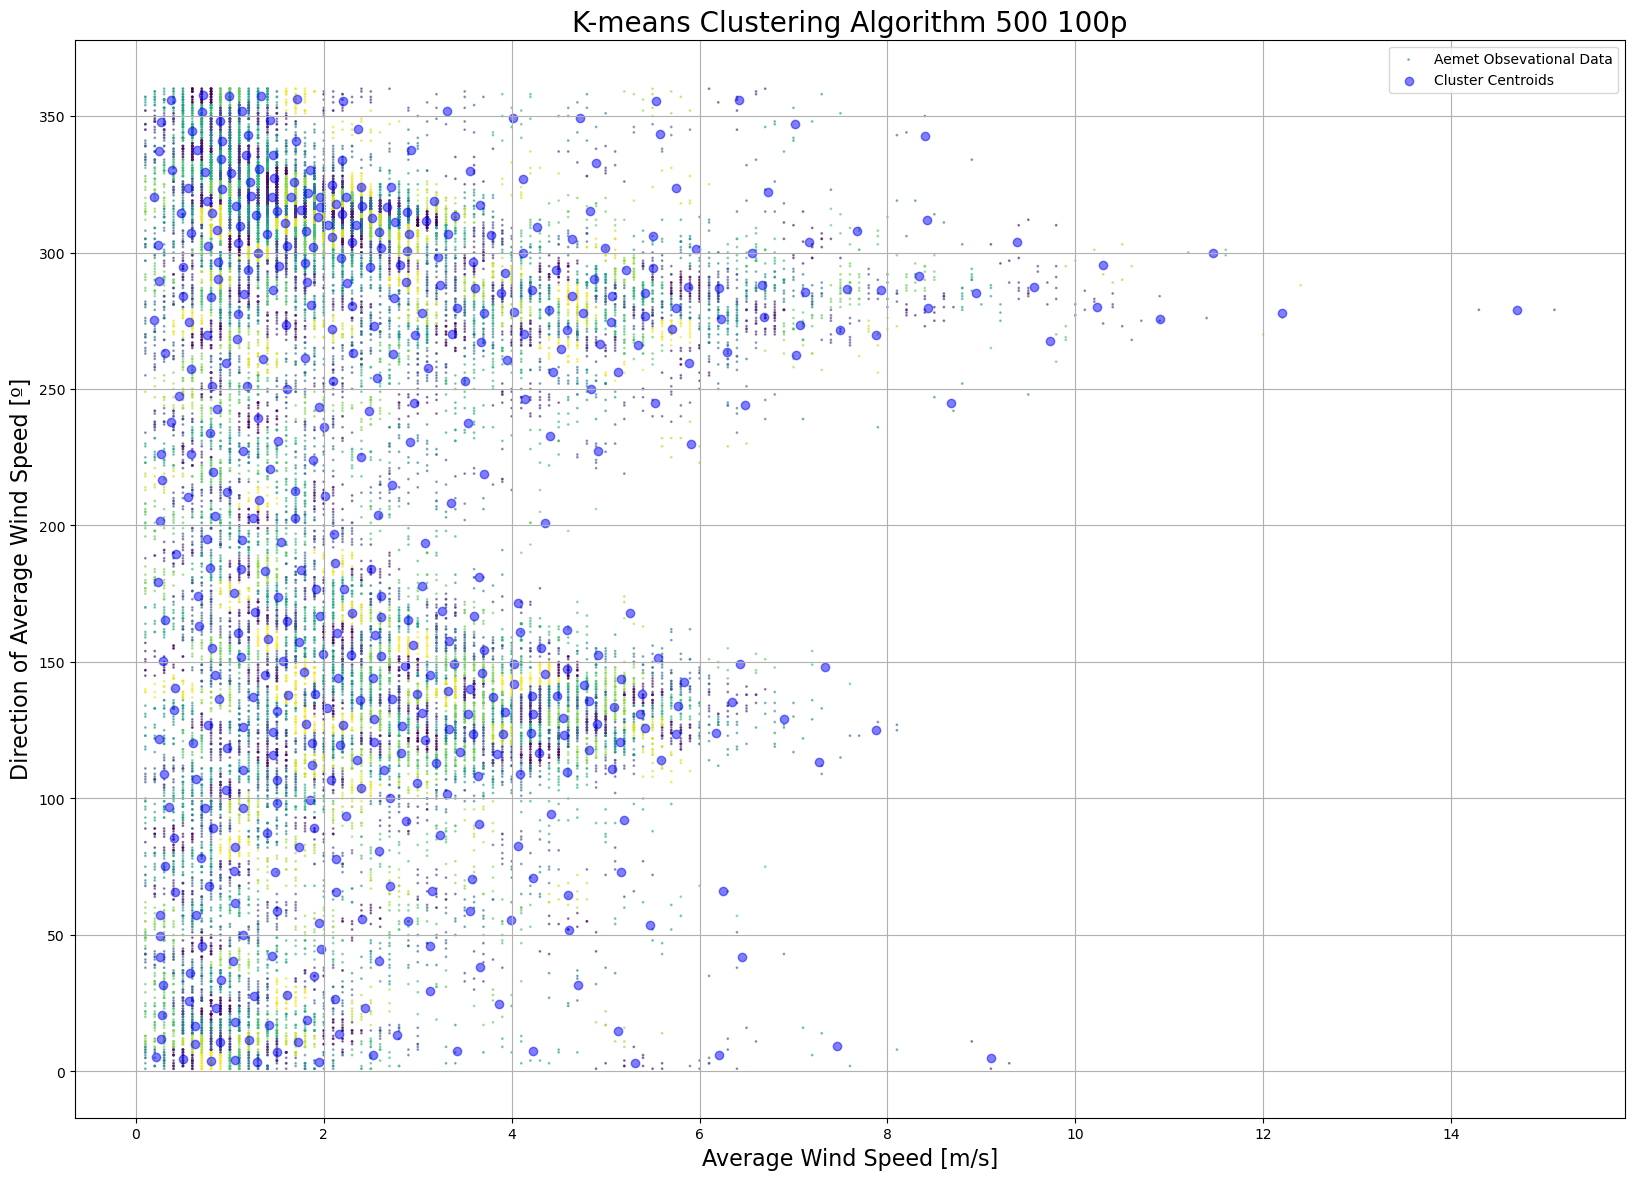

In [7]:
def plotKmeans(X_features,xfeature,yfeature,k_means_labels,figureSize,figureTitle,figureName,agg_av_speed):
    plt.figure(figsize = figureSize)
    area = 1# np.pi * ( X_features[:, 1])**2  
    #plt.scatter(df_wind101["Av_speed"].iloc[:], df_wind101["Av_direction"].iloc[:], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    #plt.scatter(X_features[:, 0], X_features[:, 1], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    #plt.scatter(agg_av_speed[agg_av_speed.columns[0]],agg_av_speed[agg_av_speed.columns[1]])
    plt.scatter(X_features[xfeature].values,X_features[yfeature].values, s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    plt.scatter(agg_av_speed[xfeature].values,agg_av_speed[yfeature].values,alpha=0.5,color='blue')
    plt.xlabel('Average Wind Speed [m/s]', fontsize=16)
    plt.ylabel('Direction of Average Wind Speed [º]', fontsize=16)
    plt.title(figureTitle.replace("_"," "),fontsize=20)
    plt.legend(['Aemet Obsevational Data','Cluster Centroids'])
    plt.grid()
    plt.savefig(figureName)
    ##plt.show()
"""
def plotKmeans(X_features,k_means_labels,figureSize,figureTitle,figureName):
    plt.figure(figsize = figureSize)
    area = 1# np.pi * ( X_features[:, 1])**2  
    #plt.scatter(df_wind101["Av_speed"].iloc[:], df_wind101["Av_direction"].iloc[:], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    plt.scatter(X_features[:, 0], X_features[:, 1], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    plt.xlabel('Average Wind Speed [m/s]', fontsize=16)
    plt.ylabel('Direction of Average Wind Speed [º]', fontsize=16)
    plt.title(figureTitle.replace("_"," "),fontsize=20)
    plt.grid()
    plt.savefig(figureName)
    ##plt.show()
"""    
#
#
#
k_means = KMeans(init = "k-means++", n_clusters = nGroups, n_init = numberReinitializations)
k_means.fit(X_features_minMaxScales)
k_means_labels = k_means.labels_ # extracting labels
k_means_cluster_centers = k_means.cluster_centers_
print(f'Labels found: {k_means_labels}')
print(f'Cluster centers found: {k_means_cluster_centers}')
#
#
print("\nAdding labels to the data set")
df_wind101_labels = df_wind101_features.copy(deep=True)
df_wind101_labels["Cluster_Labels_Kmeans"] = k_means_labels
df_wind101_labels.head(5)
#
print("\nChecking label centroids by averaging the features of point data in each cluster")
k_means_cluster_centers_averaged_values = df_wind101_labels.groupby('Cluster_Labels_Kmeans').mean() 
print( k_means_cluster_centers_averaged_values )
print("\nGrouping the date using these labels")
k_means_cluster_groupMembers = df_wind101_labels.groupby('Cluster_Labels_Kmeans')
print(k_means_cluster_groupMembers)
for key, item in k_means_cluster_groupMembers:
    print(f'================== Cluster label {key}')
    print(k_means_cluster_groupMembers.get_group(key), "\n\n")
#
#
print(f'Number of cases in each group of Cluster_Labels_Kmeans')
print(df_wind101_labels.groupby(["Cluster_Labels_Kmeans",df_wind101_labels.columns[0]])["Cluster_Labels_Kmeans"].count())
print(df_wind101_labels.groupby(["Cluster_Labels_Kmeans",df_wind101_labels.columns[1]])["Cluster_Labels_Kmeans"].count())
print(f'Chacteristics of each cluster')
#agg_av_spped = df_wind101_labels.groupby(["Cluster_Labels_Kmeans",df_wind101_labels.columns[0]])[df_wind101_labels.columns[0],df_wind101_labels.columns[1]].mean()
agg_av_speed = df_wind101_labels.groupby(["Cluster_Labels_Kmeans"])[df_wind101_labels.columns[0],df_wind101_labels.columns[1]].mean()
print(agg_av_speed)
"""
def plotKmeans(X_features,k_means_labels,figureSize,figureTitle,figureName):
    plt.figure(figsize = figureSize)
    area = 1# np.pi * ( X_features[:, 1])**2  
    #plt.scatter(df_wind101["Av_speed"].iloc[:], df_wind101["Av_direction"].iloc[:], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    plt.scatter(X_features[:, 0], X_features[:, 1], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
    plt.xlabel('Average Wind Speed [m/s]', fontsize=16)
    plt.ylabel('Direction of Average Wind Speed [º]', fontsize=16)
    plt.title(figureTitle.replace("_"," "),fontsize=20)
    plt.grid()
    plt.savefig(figureName)
    ##plt.show()
"""    
# lets plot the cluster based on the averaged wind speed and direction of average wind speed
plotKmeans(df_wind101_labels,'Av_speed','Av_direction',k_means_labels,figureSize,f'K-means_Clustering_Algorithm_{nGroups}_100p',f'{bubbles_clusterPlot}_kmeans_{nGroups}_100p',agg_av_speed)

In [16]:
#
# 
#fig = plt.figure(1, figsize=(8, 6))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#plt.cla()
## plt.ylabel('Age', fontsize=18)
## plt.xlabel('Income', fontsize=16)
## plt.zlabel('Education', fontsize=16)
#ax.set_xlabel('Average Wind Speed [m/s]', fontsize=18)
#ax.set_ylabel('Direction of Average Wind Speed [º]', fontsize=16)
#ax.set_zlabel('Time [s]')
#ax.scatter(X_features[:, 0], X_features[:, 1], X_features[:, 4], c= k_means_labels.astype(np.float))
#plt.savefig(bubbles_clusterPlot_3D)
###plt.show()
## 
# 
# 
# 

In [17]:

#saving kmeans model
kmeansModelName = f"kmeans_model_n{nGroups}_100p.pkl"
with open(kmeansModelName, "wb") as f:
    pickle.dump(k_means, f)
#Uncomment this for loading the model
"""
with open(kmeansModelName, "rb") as f:
    k_means_loaded = pickle.load(f)
print(k_means_loaded)
"""

'\nwith open(kmeansModelName, "rb") as f:\n    k_means_loaded = pickle.load(f)\nprint(k_means_loaded)\n'

In [18]:
#saving to csv
df_wind101_labels.to_csv(f'wind_clustering_df101_labels_kmeans_{nGroups}.csv', index=False)
#Binary data
df_wind101_labels.to_pickle(f"./ind_clustering_df101_labels_kmeans_{nGroups}.pkl")  
df_wind101_labels = pd.read_pickle(f"./ind_clustering_df101_labels_kmeans_{nGroups}.pkl") 
print(df_wind101_labels.head())
print(df_wind101_labels.tail())
print(df_wind101_labels.info())
print(df_wind101_labels.describe())

   Av_speed  Av_direction  Cluster_Labels_Kmeans
0  6.500000         284.0                     24
1  5.199219         282.0                    474
2  2.000000         292.0                    293
3  5.898438         295.0                    174
4  6.000000         284.0                    339
       Av_speed  Av_direction  Cluster_Labels_Kmeans
24495  2.800781         248.0                    263
24496  3.400391         210.0                    412
24497  1.700195         162.0                    483
24498  1.200195          72.0                    285
24499  1.099609         357.0                    101
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24500 entries, 0 to 24499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Av_speed               24500 non-null  float16
 1   Av_direction           24500 non-null  float16
 2   Cluster_Labels_Kmeans  24500 non-null  int32  
dtypes: float16(2), 